<a href="https://colab.research.google.com/github/jcmachicao/pucp__gobierno_sistemas_proyectos/blob/main/men623__financiamiento_portafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financiamiento Dinámico del Portafolio de Proyectos

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [1]:
# ------------------------------
# 1. Proyectos con asignación tradicional
# ------------------------------
proyectos_tradicionales = ['Proyecto A', 'Proyecto B', 'Proyecto C', 'Proyecto D']
fondos_tradicionales = [250_000, 250_000, 250_000, 250_000]  # Asignación uniforme

In [9]:
# ------------------------------
# 2. Proyectos con asignación basada en generación de valor
# ------------------------------
proyectos_agiles = ['Proyecto E', 'Proyecto F', 'Proyecto G', 'Proyecto H']
valor_estimado = [80, 200, 50, 170]  # Puntuación de valor (por ejemplo de 0 a 200)

# Normalizar los valores para que sumen el mismo total que los fondos tradicionales
total_fondos = sum(fondos_tradicionales)
fondos_agiles = [round((v / sum(valor_estimado)) * total_fondos, 2) for v in valor_estimado]

# Crear DataFrames
df_tradicional = pd.DataFrame({
    'Proyecto': proyectos_tradicionales,
    'Fondos Asignados': fondos_tradicionales
})

df_agil = pd.DataFrame({
    'Proyecto': proyectos_agiles,
    'Valor Estimado': valor_estimado,
    'Fondos Asignados': fondos_agiles
})

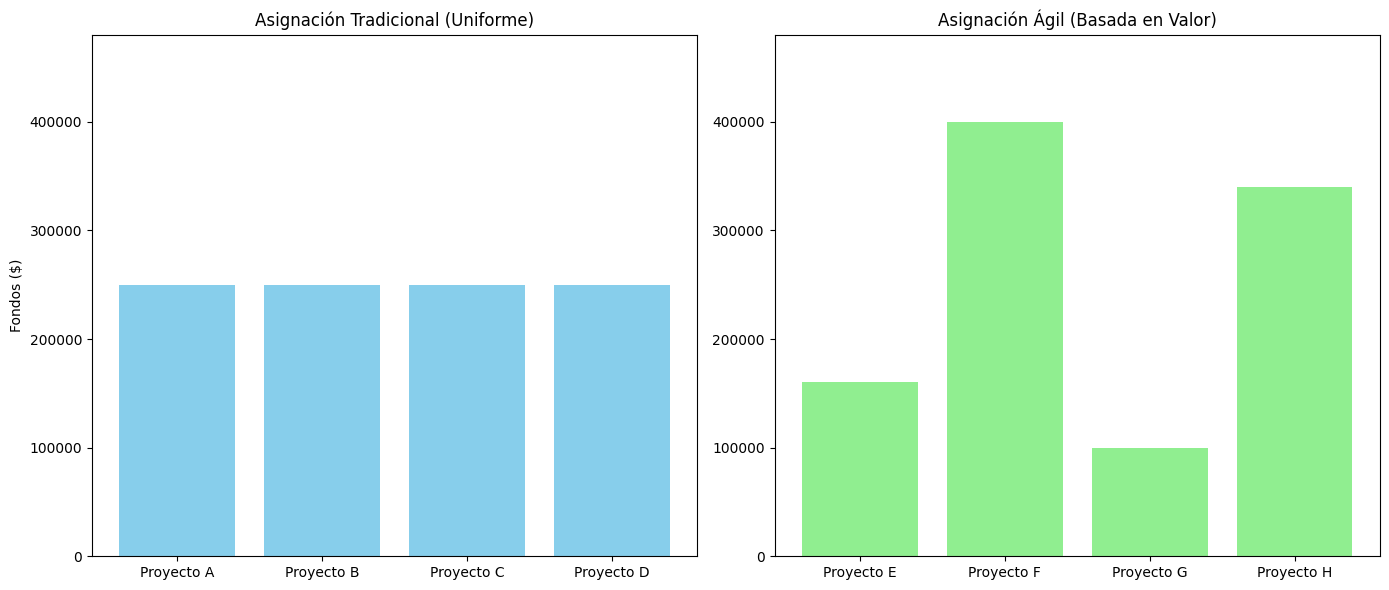

(     Proyecto  Fondos Asignados
 0  Proyecto A            250000
 1  Proyecto B            250000
 2  Proyecto C            250000
 3  Proyecto D            250000,
      Proyecto  Valor Estimado  Fondos Asignados
 0  Proyecto E              80          160000.0
 1  Proyecto F             200          400000.0
 2  Proyecto G              50          100000.0
 3  Proyecto H             170          340000.0)

In [10]:
# ------------------------------
# Graficar la comparación
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico tradicional
axes[0].bar(df_tradicional['Proyecto'], df_tradicional['Fondos Asignados'], color='skyblue')
axes[0].set_title('Asignación Tradicional (Uniforme)')
axes[0].set_ylabel('Fondos ($)')
axes[0].set_ylim(0, max(fondos_tradicionales + fondos_agiles) * 1.2)

# Gráfico ágil
axes[1].bar(df_agil['Proyecto'], df_agil['Fondos Asignados'], color='lightgreen')
axes[1].set_title('Asignación Ágil (Basada en Valor)')
axes[1].set_ylim(0, max(fondos_tradicionales + fondos_agiles) * 1.2)

plt.tight_layout()
plt.show()

df_tradicional, df_agil


# Simulación

## ¿Qué hace esta simulación?
## Cada periodo:
Actualiza el valor estimado de cada proyecto con una variación aleatoria (de –10% a +20%), simulando la incertidumbre del entorno.<br>
Calcula las nuevas asignaciones de fondos basadas en esos valores.<br>
Registra la evolución del valor proyectado y los fondos asignados.
<br>
## ¿Qué muestra el gráfico?
La línea de cada proyecto representa cómo evoluciona su financiamiento en función del valor que genera.
<br>
Por ejemplo, si el Proyecto F comienza con alto valor y lo mantiene, seguirá captando buena parte del presupuesto.
<br>
Si el Proyecto G mejora su valor relativo, comenzará a recibir más inversión.
<br>
## ¿Qué decisiones se pueden simular con esto?
Detener proyectos con bajo rendimiento si su valor sigue cayendo.
<br>
Reasignar fondos más agresivamente a proyectos en crecimiento.
<br>
Incorporar nuevos proyectos si emergen y tienen alto valor.
<br>
Ajustar el presupuesto total disponible por periodo según condiciones externas.

In [5]:
# ------------------------------
# PARÁMETROS DE LA SIMULACIÓN
# ------------------------------
n_periodos = 6  # Número de periodos de evaluación (por ejemplo, trimestres)
capacidad_total = 1_000_000  # Presupuesto total por periodo

# Valor base de los proyectos ágiles (podría cambiar con el tiempo)
proyectos_agiles_base = {
    'Proyecto E': 80,
    'Proyecto F': 200,
    'Proyecto G': 50,
    'Proyecto H': 170
}

In [7]:
# Iniciamos una tabla para almacenar la evolución
historial = []

# ------------------------------
# SIMULACIÓN
# ------------------------------
for periodo in range(1, n_periodos + 1):
    # Simulamos cambios en el valor esperado de cada proyecto (entre -10% y +20%)
    valores_periodo = {}
    for proyecto, valor_actual in proyectos_agiles_base.items():
        variacion = random.uniform(-0.1, 0.2)
        nuevo_valor = max(0, valor_actual * (1 + variacion))
        valores_periodo[proyecto] = round(nuevo_valor, 2)
        proyectos_agiles_base[proyecto] = nuevo_valor  # actualizar para el siguiente periodo

    # Calcular nueva asignación proporcional al valor estimado
    total_valor = sum(valores_periodo.values())
    asignaciones_periodo = {
        proyecto: round((valor / total_valor) * capacidad_total, 2)
        for proyecto, valor in valores_periodo.items()
    }

    # Guardamos los resultados del periodo
    for proyecto in proyectos_agiles_base:
        historial.append({
            'Periodo': periodo,
            'Proyecto': proyecto,
            'Valor Estimado': valores_periodo[proyecto],
            'Fondos Asignados': asignaciones_periodo[proyecto]
        })

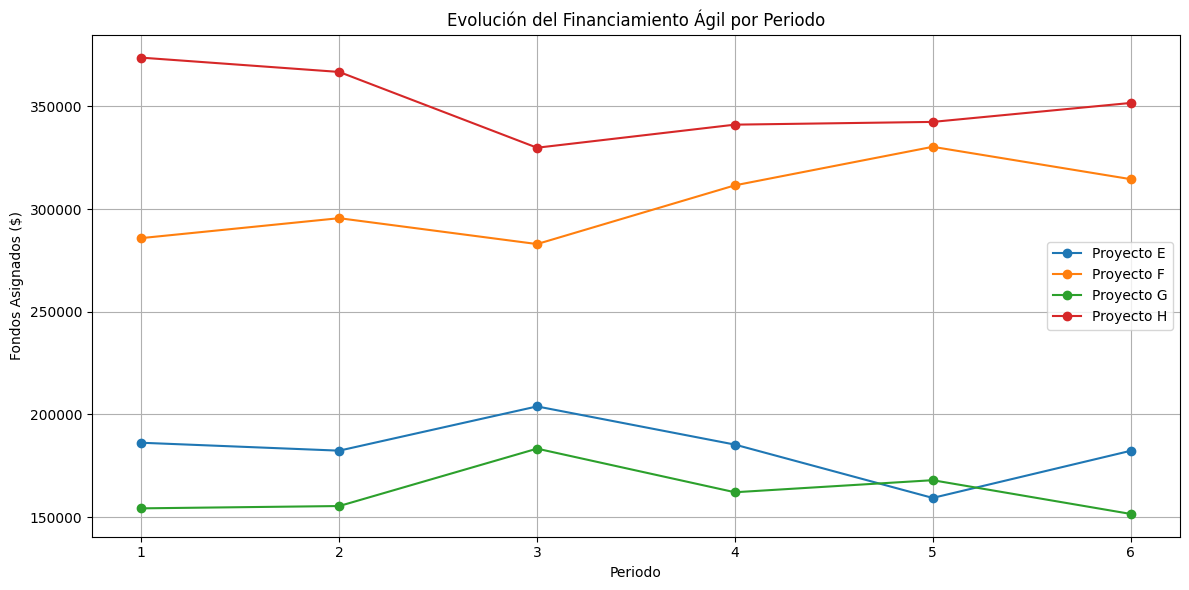

,Periodo,Proyecto,Valor Estimado,Fondos Asignados
0,1,Proyecto E,117.43,186192.90
1,1,Proyecto F,180.28,285845.66
2,1,Proyecto G,97.28,154243.76
3,1,Proyecto H,235.70,373717.67
4,2,Proyecto E,115.68,182336.90
5,2,Proyecto F,187.50,295540.88
6,2,Proyecto G,98.57,155367.81
7,2,Proyecto H,232.68,366754.41
8,3,Proyecto E,130.90,203881.38
9,3,Proyecto F,181.66,282941.87


In [8]:
# Convertir a DataFrame para análisis
df_simulacion = pd.DataFrame(historial)

# ------------------------------
# Visualización de evolución del financiamiento
# ------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

for proyecto in proyectos_agiles_base:
    datos = df_simulacion[df_simulacion['Proyecto'] == proyecto]
    ax.plot(datos['Periodo'], datos['Fondos Asignados'], marker='o', label=proyecto)

ax.set_title('Evolución del Financiamiento Ágil por Periodo')
ax.set_xlabel('Periodo')
ax.set_ylabel('Fondos Asignados ($)')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df_simulacion.head(12)  # Mostrar los primeros 12 registros como ejemplo